In [1]:
import pandas as pd
dataset = pd.read_csv("./datasets/heart_2020_cleaned.csv")
dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<AxesSubplot:xlabel='HeartDisease'>

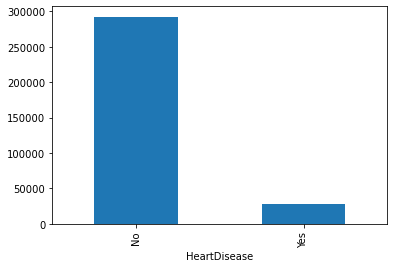

In [3]:
dataset.groupby("HeartDisease")\
    .size()\
    .plot(kind="bar")

In [4]:
dataset.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
def transform_to_binary(val):
    """
    val is equal to "Yes" or "No"
    This function should return 0 or 1
    """
    if(val == "Male" or val == "Female"):
        return int(val == "Male")
    else:
        return int(val == "Yes")

In [6]:
categorical_features = ["Smoking","AlcoholDrinking","Stroke","DiffWalking","Sex","Diabetic","PhysicalActivity","Asthma","KidneyDisease","SkinCancer", 'HeartDisease']
numerical_features = ["BMI", "PhysicalHealth", "MentalHealth","SleepTime"]
dataset = dataset[categorical_features+numerical_features].copy()

for feature in categorical_features:
    dataset[feature] = dataset[feature].apply(transform_to_binary)

dataset

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1,0,0,0,0,1,1,1,0,1,0,16.60,3.0,30.0,5.0
1,0,0,1,0,0,0,1,0,0,0,0,20.34,0.0,0.0,7.0
2,1,0,0,0,1,1,1,1,0,0,0,26.58,20.0,30.0,8.0
3,0,0,0,0,0,0,0,0,0,1,0,24.21,0.0,0.0,6.0
4,0,0,0,1,0,0,1,0,0,0,0,23.71,28.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0,0,1,1,1,0,1,0,0,1,27.41,7.0,0.0,6.0
319791,1,0,0,0,1,0,1,1,0,0,0,29.84,0.0,0.0,5.0
319792,0,0,0,0,0,0,1,0,0,0,0,24.24,0.0,0.0,6.0
319793,0,0,0,0,0,0,0,0,0,0,0,32.81,0.0,0.0,12.0


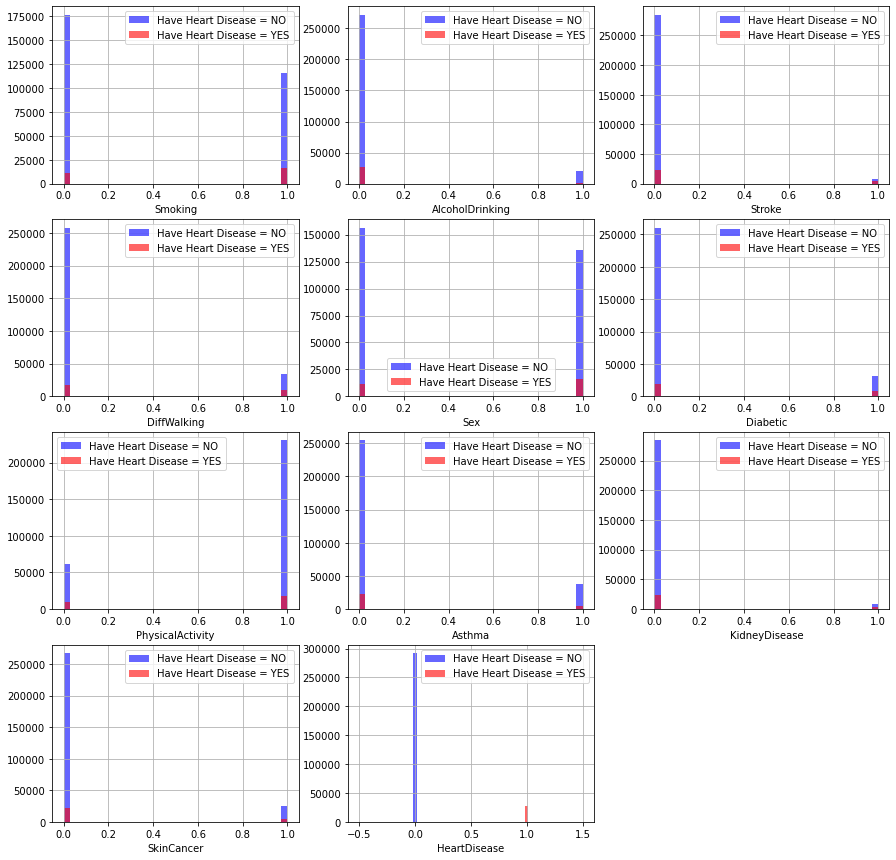

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    dataset[dataset["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

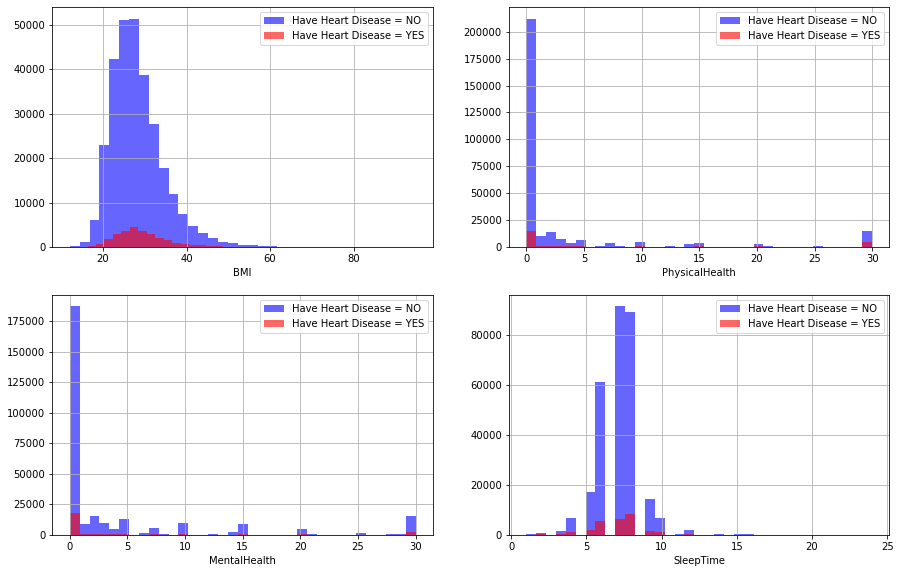

In [8]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    dataset[dataset["HeartDisease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    dataset[dataset["HeartDisease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [9]:
dataset.describe()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000
mean,0.412477,0.068097,0.037740,0.138870,0.475273,0.127588,0.775362,0.134061,0.036833,0.093244,0.085595,28.325399,3.37171,3.898366,7.097075
std,0.492281,0.251912,0.190567,0.345812,0.499389,0.333631,0.417344,0.340718,0.188352,0.290775,0.279766,6.356100,7.95085,7.955235,1.436007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.020000,0.00000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.030000,0.00000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,27.340000,0.00000,0.000000,7.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.420000,2.00000,3.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.850000,30.00000,30.000000,24.000000


In [10]:
X = dataset.drop(["HeartDisease"], axis=1).copy()
y = dataset["HeartDisease"]
X.shape, y.shape

((319795, 14), (319795,))

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(f"Shape of 'X_train' is: {X_train.shape}")
print(f"Shape of 'X_test' is: {X_test.shape}")
print(f"Shape of 'y_train' is: {y_train.shape}")
print(f"Shape of 'y_test' is: {y_test.shape}")

Shape of 'X_train' is: (223856, 14)
Shape of 'X_test' is: (95939, 14)
Shape of 'y_train' is: (223856,)
Shape of 'y_test' is: (95939,)


In [12]:
hd_rate_train = y_train.mean()
hd_rate_test = y_test.mean()

print(f"Churn Rate in trainset is: {hd_rate_train:.3f}")
print(f"Churn Rate in testset is: {hd_rate_test:.3f}")

Churn Rate in trainset is: 0.086
Churn Rate in testset is: 0.085


In [13]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
mat_train = confusion_matrix(y_train, y_train_pred)
mat_test = confusion_matrix(y_test, y_test_pred) 

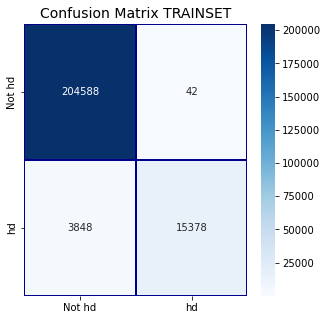

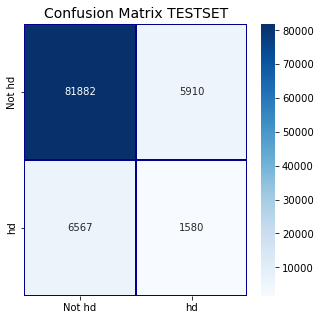

In [16]:
import seaborn as sns

for lab, cm in zip(["TRAINSET", "TESTSET"], [mat_train, mat_test]):
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm, 
                xticklabels=['Not hd', 'hd'],
                yticklabels=['Not hd', 'hd'],
                annot=True,ax=ax1,fmt="d",
                linewidths=.2,linecolor="Darkblue", cmap="Blues")
    plt.title(f'Confusion Matrix {lab}', fontsize=14)
    plt.show()

(15.5, -0.5)

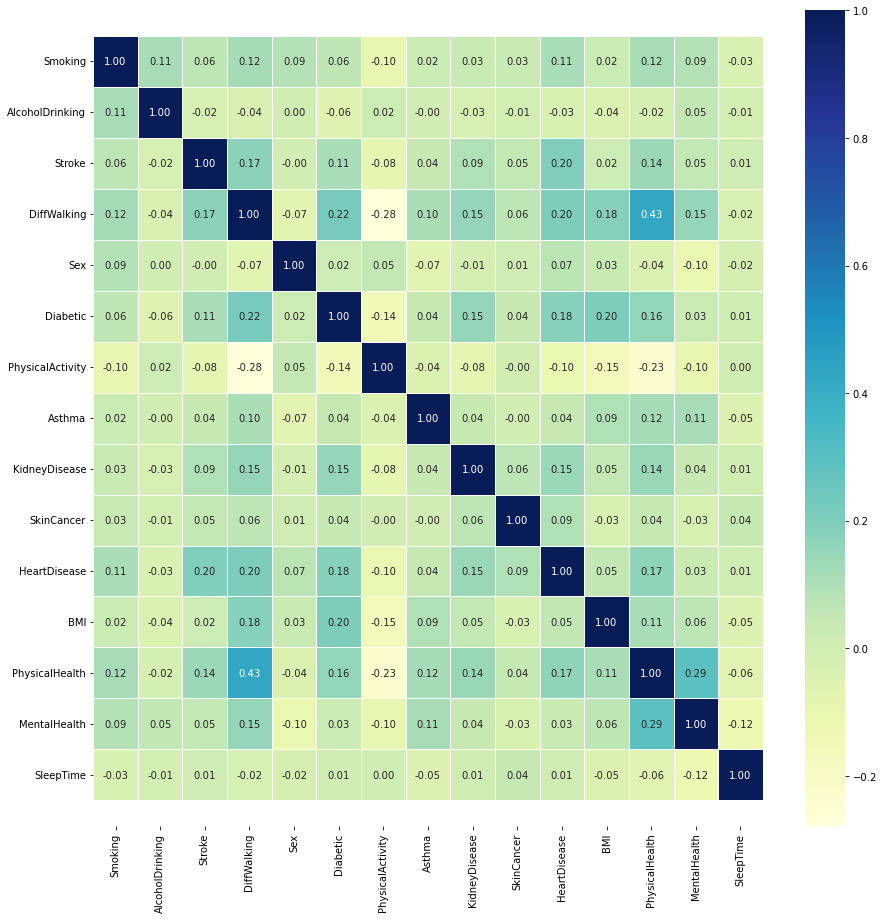

In [17]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

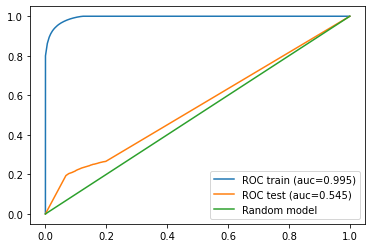

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

y_train_pred = model.predict_proba(X_train)[:,1]
y_test_pred = model.predict_proba(X_test)[:,1]

fpr, tpr, thr = roc_curve(y_train, y_train_pred)
auc = roc_auc_score(y_train, y_train_pred)
plt.plot(fpr, tpr, label=f"ROC train (auc={auc:.3f})")

fpr, tpr, thr = roc_curve(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
plt.plot(fpr, tpr, label=f"ROC test (auc={auc:.3f})")

plt.plot([0,1], [0,1], label="Random model")
plt.legend()

In [19]:
from sklearn.ensemble import RandomForestClassifier

def compute_randomForest_auc(max_depth):
    """
    This function compute the ROC AUC of a RandomForest algorithm
    Input: max_depths : paramter to pass to the algorithm
    Output
    * roc auc on traintest
    * roc auc on testset
    """
    model = RandomForestClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)
    return (auc_train, auc_test)

%time compute_randomForest_auc(5)

CPU times: total: 1.33 s
Wall time: 9.53 s


(0.775250070383775, 0.7759255181226752)

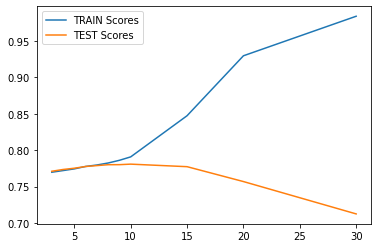

In [20]:
xx = list(range(3,11)) +[15, 20, 30]
train_scores, test_scores = zip(*[compute_randomForest_auc(n) for n in xx])

plt.plot(xx, train_scores, label="TRAIN Scores")
plt.plot(xx, test_scores, label="TEST Scores")
plt.legend()

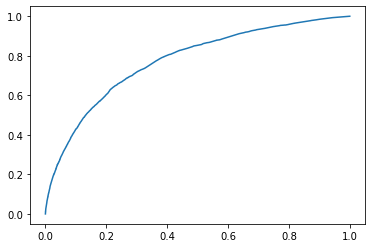

In [21]:
# Here we write a function to help implement K-fold validation
def compute_RF_performance(X_train, y_train, X_test, y_test, **params):
    """
    This function computes performance of RF for given Train/Test set
    X_train/y_train are features and target for trainset
    X_test/y_test are features and target for testset
    params is a set of parameters to pass to the algorithm
    It should plot the ROC Curve on test set
    """
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_test_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thr = roc_curve(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    plt.plot(fpr, tpr, label=f"ROC (auc={auc:.3f})")
    
compute_RF_performance(X_train, y_train, X_test, y_test, n_estimators=50, max_depth=4)

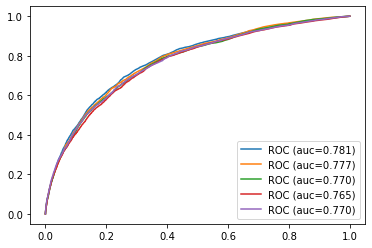

In [22]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5) 
for train, test in cv.split(X):
    compute_RF_performance(X.iloc[train], y.iloc[train], X.iloc[test], y.iloc[test], n_estimators=100, max_depth=4)
    plt.legend()

In [23]:
import xgboost as xgb

D:\Dev_Soft\envs\ML_Cours\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [24]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

D:\Dev_Soft\envs\ML_Cours\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [25]:
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
preds

[21:34:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.24184652, 0.24184652, 0.07345137, ..., 0.07345137, 0.07345137,
       0.07345137], dtype=float32)

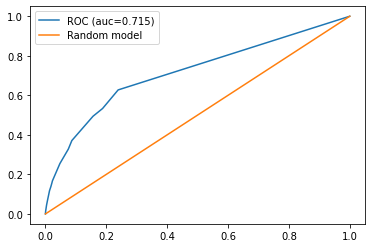

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thr = roc_curve(y_test, preds)
auc = roc_auc_score(y_test, preds)
plt.plot(fpr, tpr, label=f"ROC (auc={auc:.3f})")

plt.plot([0,1], [0,1], label="Random model")
plt.legend()

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
X = dataset.drop(["HeartDisease"], axis=1).copy()
y = dataset["HeartDisease"]
X.shape, y.shape

((319795, 14), (319795,))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(f"Shape of 'X_train' is: {X_train.shape}")
print(f"Shape of 'X_test' is: {X_test.shape}")
print(f"Shape of 'y_train' is: {y_train.shape}")
print(f"Shape of 'y_test' is: {y_test.shape}")

Shape of 'X_train' is: (223856, 14)
Shape of 'X_test' is: (95939, 14)
Shape of 'y_train' is: (223856,)
Shape of 'y_test' is: (95939,)


In [30]:
hd_rate_train = y_train.mean()
hd_rate_test = y_test.mean()

print(f"Churn Rate in trainset is: {hd_rate_train:.3f}")
print(f"Churn Rate in testset is: {hd_rate_test:.3f}")

Churn Rate in trainset is: 0.085
Churn Rate in testset is: 0.086


In [31]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

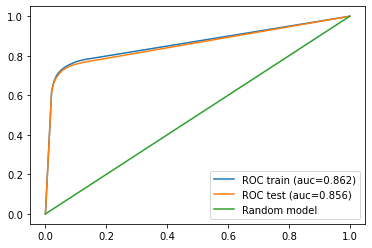

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

y_train_pred = model.predict_proba(X_train)[:,1]
y_test_pred = model.predict_proba(X_test)[:,1]

fpr, tpr, thr = roc_curve(y_train, y_train_pred)
auc = roc_auc_score(y_train, y_train_pred)
plt.plot(fpr, tpr, label=f"ROC train (auc={auc:.3f})")

fpr, tpr, thr = roc_curve(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)
plt.plot(fpr, tpr, label=f"ROC test (auc={auc:.3f})")

plt.plot([0,1], [0,1], label="Random model")
plt.legend()